In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [46]:
import pandas as pd

df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [47]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
df_num = df.select_dtypes(include=[np.number])
df_num = df_num.fillna(df_num.mean())

In [49]:
y_hat = df_num["median_house_value"].values
epsilon = 1e-3

X = df_num.drop("median_house_value",axis=1).values

X = (X - X.mean(axis=0)) / X.std(axis=0)

In [50]:
print(X.shape[0])

20640


In [51]:
m = X.shape[0]

X = np.c_[np.ones(m),X]

In [52]:
def f(X,w):
    return X @ w;

In [53]:
print(len(y_hat))

20640


In [54]:
def J(X , y , w):
    m = len(y)
    return (1/(2*m)) * np.sum((f(X,w) - y)**2)

In [55]:
import matplotlib.pyplot as plt

w = np.zeros(X.shape[1])
alpha = 0.01
epochs = 1000
m = len(y_hat)
costs = []

In [56]:
y_hat = (y_hat - y_hat.mean())/y_hat.std()

Converged at itteration:  88


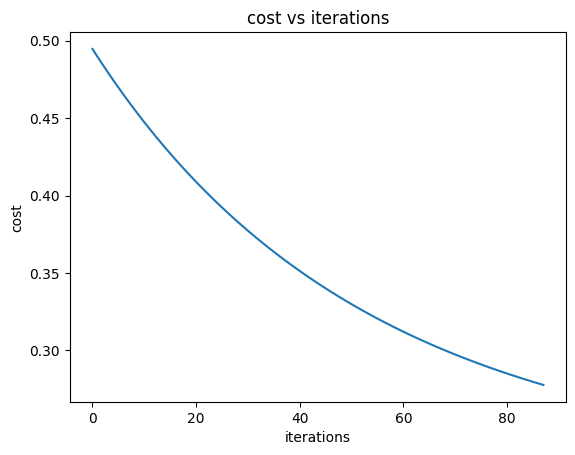

In [57]:
previous_cost = float('inf')
for i in range(epochs):
    preds = f(X,w)

    gradient = (1/m) * (X.T @ (preds - y_hat))

    w = w - alpha * gradient
    cost = J(X , y_hat , w)
    costs.append(cost)
    diff = abs(previous_cost - cost)
    previous_cost = cost
    if diff <= epsilon:
        print("Converged at itteration: ",i+1)
        break

plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations")
plt.show()

